In [3]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [25]:
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)
def manhattan_distance(point1, point2):
    return np.sum(np.abs(point1 - point2))
def knn_predict(X_train, y_train, X_test, k, metric):
    predictions = []
    for test_point in X_test:
        distances = [metric(test_point, train_point) for train_point in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    return np.array(predictions)

In [26]:
np.random.seed(42)
n_samples_per_class = 100

X1 = np.random.randn(n_samples_per_class, 2) + np.array([2, 2])
X2 = np.random.randn(n_samples_per_class, 2) + np.array([-2, -2])
X = np.vstack([X1, X2])
y = np.array([0] * n_samples_per_class + [1] * n_samples_per_class)
X3 = np.random.randn(n_samples_per_class, 2) + np.array([2, -2])


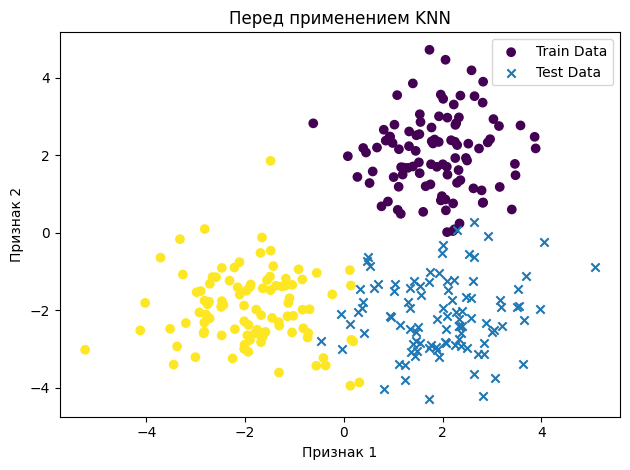

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', label='Train Data')
plt.scatter(X3[:, 0], X3[:, 1], marker='x', label='Test Data')
plt.title("Перед применением KNN")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()

plt.tight_layout()
plt.show()

In [37]:
k = 3
predictions = knn_predict(X, y, X3, k, euclidean_distance)
print(predictions)

[1 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1
 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0
 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 1]


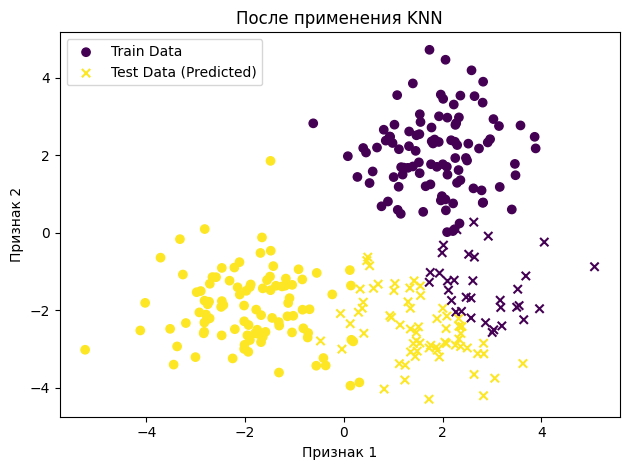

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', label='Train Data')
plt.scatter(X3[:, 0], X3[:, 1], c=predictions, cmap='viridis', marker='x', label='Test Data (Predicted)')
plt.title("После применения KNN")
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.legend()

plt.tight_layout()
plt.show()